In [1]:
# Import data science environment.
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='internal gelsd'
)

# Introduction

This dataset was taken from "Telecom Customer Churn" dataset from the Kaggle website (https://www.kaggle.com/dheerajetx/telecom#WA_Fn-UseC_-Telco-Customer-Churn.xlsx). 

## Research Interest

<b>Objective:</b> To build various models in order to predict whether a customer will drop telecommunications services (churn) or maintain those services based on various demographic and service specific data.

<b>Original Feature Set</b>
<ul><li>customerID: String - alpha-numeric</li>
    <li>gender: Categorical</li>
    <li>SeniorCitizen: Categorical</li>
    <li>Partner: Categorical</li>
    <li>Dependents: Categorical</li>
    <li>tenure: Numerical - Continuous</li>
    <li>PhoneService: Categorical</li>
    <li>MultipleLines: Categorical</li>
    <li>InternetService: Categorical</li>
    <li>OnlineSecurity: Categorical</li>
    <li>OnlineBackup: Categorical</li>
    <li>DeviceProtection: Categorical</li>
    <li>TechSupport: Categorical</li>
    <li>StreamingTV: Categorical</li>
    <li>StreamingMovies: Categorical</li>
    <li>Contract: Categorical</li>
    <li>PaperlessBilling: Categorical</li>
    <li>PaymentMethod: Categorical</li>
    <li>MonthlyCharges: Numerical - Continuous</li>
    <li>TotalCharges: Numerical - Continuous</li>
    <li>Churn: Categorical</li></ul>

# Data Exploration

In [2]:
# Load and preview the data file.
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [3]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [4]:
# Check data types.
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# View the size of the data.
churn.shape

(7043, 21)

In [6]:
# View column names and unique values.
pd.Series({c: churn[c].unique() for c in churn})

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

# Conversions

In [7]:
# Convert 'yes'/'no' values to '1'/'0'.
churn['Partner'] = churn['Partner'].apply(lambda x: 0 if x == 'No' else 1)
churn['Dependents'] = churn['Dependents'].apply(
    lambda x: 0 if x == 'No' else 1)
churn['PhoneService'] = churn['PhoneService'].apply(
    lambda x: 0 if x == 'No' else 1)
churn['PaperlessBilling'] = churn['PaperlessBilling'].apply(
    lambda x: 0 if x == 'No' else 1)
churn['Churn'] = churn['Churn'].apply(lambda x: 0 if x == 'No' else 1)

# Convert 'yes'/'no'/'no service' values to '1'/'0'/'0'
# (since 'no service' is the same as 'no').
churn['MultipleLines'].replace(('No phone service', 'No', 'Yes'), (0, 0, 1),
                               inplace=True)
churn['OnlineSecurity'].replace(('No', 'Yes', 'No internet service'),
                                (0, 1, 0), inplace=True)
churn['OnlineBackup'].replace(('Yes', 'No', 'No internet service'),
                              (1, 0, 0), inplace=True)
churn['DeviceProtection'].replace(('No', 'Yes', 'No internet service'),
                                  (0, 1, 0), inplace=True)
churn['TechSupport'].replace(('No', 'Yes', 'No internet service'), (0, 1, 0),
                             inplace=True)
churn['StreamingTV'].replace(('No', 'Yes', 'No internet service'), (0, 1, 0),
                             inplace=True)
churn['StreamingMovies'].replace(('No', 'Yes', 'No internet service'),
                                 (0, 1, 0), inplace=True)

# Covert 'DSL'/'Fiber optic'/'No' to '1'/'2'/'0' since fiber optic is fastest.
churn['InternetService'].replace(('DSL', 'Fiber optic', 'No'), (1, 2, 0),
                                 inplace=True)

# Convert to number of years.
churn['Contract'].replace(('Month-to-month', 'One year', 'Two year'),
                          (0, 1, 2), inplace=True)

# Convert 'male'/'female' to '1'/'0'.
churn['gender'].replace(('Female', 'Male'), (0, 1), inplace=True)

churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,Electronic check,70.700,151.65,1


# Value Counts

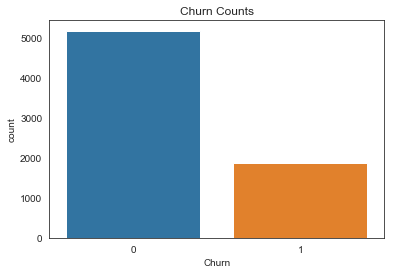

0    5174
1    1869
Name: Churn, dtype: int64

In [8]:
# View value counts.
sns.countplot('Churn', data=churn)
plt.title('Churn Counts')
plt.show()
pd.value_counts(churn['Churn'])

# Missingness

In [9]:
# Check for null values.
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# View column names and unique values.
pd.Series({c: churn[c].unique() for c in churn})

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                         [0, 1]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [0, 1]
MultipleLines                                                  [0, 1]
InternetService                                             [1, 2, 0]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies     

In [11]:
# After getting an error message attempting to run histograms with the
# 'TotalCharges' column, I wondered if a space (' ') was present as a value.
total_charges_zero = churn[churn['TotalCharges'] == ' ']
total_charges_zero

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,0,1,1,...,1,1,1,0,2,1,Bank transfer (automatic),52.550,,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,0,...,0,0,0,0,2,0,Mailed check,20.250,,0
936,5709-LVOEQ,0,0,1,1,0,1,0,1,1,...,1,0,1,1,2,0,Mailed check,80.850,,0
1082,4367-NUYAO,1,0,1,1,0,1,1,0,0,...,0,0,0,0,2,0,Mailed check,25.750,,0
1340,1371-DWPAZ,0,0,1,1,0,0,0,1,1,...,1,1,1,0,2,0,Credit card (automatic),56.050,,0
3331,7644-OMVMY,1,0,1,1,0,1,0,0,0,...,0,0,0,0,2,0,Mailed check,19.850,,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,0,...,0,0,0,0,2,0,Mailed check,25.350,,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,0,...,0,0,0,0,2,0,Mailed check,20.000,,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,1,Mailed check,19.700,,0
6670,4075-WKNIU,0,0,1,1,0,1,1,1,0,...,1,1,1,0,2,0,Mailed check,73.350,,0


In [12]:
# Eleven values are ' '. Let's look at one of the rows.
churn.loc[488]

customerID                         4472-LVYGI
gender                                      0
SeniorCitizen                               0
Partner                                     1
Dependents                                  1
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             1
OnlineSecurity                              1
OnlineBackup                                0
DeviceProtection                            1
TechSupport                                 1
StreamingTV                                 1
StreamingMovies                             0
Contract                                    2
PaperlessBilling                            1
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                         52.550
TotalCharges                                 
Churn                                       0
Name: 488, dtype: object

In [13]:
# Replace empty cells (' ') with '0'.
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', '0')
churn.loc[488]

customerID                         4472-LVYGI
gender                                      0
SeniorCitizen                               0
Partner                                     1
Dependents                                  1
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             1
OnlineSecurity                              1
OnlineBackup                                0
DeviceProtection                            1
TechSupport                                 1
StreamingTV                                 1
StreamingMovies                             0
Contract                                    2
PaperlessBilling                            1
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                         52.550
TotalCharges                                0
Churn                                       0
Name: 488, dtype: object

In [14]:
# Change dtype from object to float.
churn['TotalCharges'] = churn['TotalCharges'].astype('float64')

# Outliers and Central Tendencies

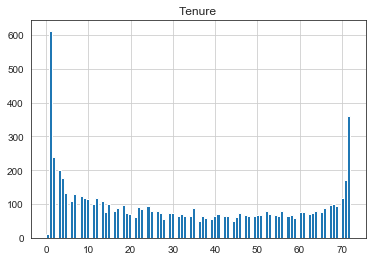

Median  29.0
Std  24.55948102309446
Outliers above  78.11896204618893


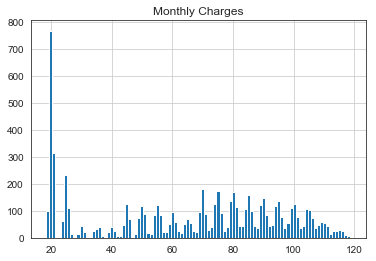

Median  70.35
Std  30.090047097678493
Outliers above  130.53009419535698  and below  10.169905804643008


In [15]:
# Check for outliers, central tendencies.
churn['tenure'].hist(bins=100)
plt.title('Tenure')
plt.show()

median = churn['tenure'].median()
std = churn['tenure'].std()
pop_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)


churn['MonthlyCharges'].hist(bins=100)
plt.title('Monthly Charges')
plt.show()

median = churn['MonthlyCharges'].median()
std = churn['MonthlyCharges'].std()
pop_out1 = median + 2 * std
pop_out2 = median - 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out1, ' and below ', pop_out2)

# Create Dummy Variables

In [16]:
# Create dummy variables for remaining categorical data.
dummy = pd.get_dummies(churn['PaymentMethod'])

# Merge dataframes together.
churn_dum = churn.merge(dummy, left_index=True, right_index=True)

# Drop 'PaymentMethod' column.
churn_dum.drop(['PaymentMethod'], axis=1)

churn_dum.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,1,Electronic check,29.850,29.850,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,Mailed check,56.950,1889.500,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,1,Mailed check,53.850,108.150,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,0,Bank transfer (automatic),42.300,1840.750,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,1,Electronic check,70.700,151.650,1,0,0,1,0


In [17]:
# Recheck data types.
churn_dum.dtypes

customerID                    object
gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
InternetService                int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract                       int64
PaperlessBilling               int64
PaymentMethod                 object
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
Mailed check                   uint8
dtype: object

In [18]:
# Change dtypes from 'uint8' to 'int64'.
cols_to_include = ['Bank transfer (automatic)', 'Credit card (automatic)',
                   'Electronic check', 'Mailed check']
for col in churn_dum.columns:
    if churn_dum[col].nunique() < 10 and col in cols_to_include:
        churn_dum[col] = churn_dum[col].astype('int64')
churn_dum.dtypes

customerID                    object
gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
InternetService                int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract                       int64
PaperlessBilling               int64
PaymentMethod                 object
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
Bank transfer (automatic)      int64
Credit card (automatic)        int64
Electronic check               int64
Mailed check                   int64
dtype: object

# Separate by Target Values

In [19]:
# Create dataframe of only customers who churned.
churn_yes = churn_dum[churn_dum['Churn'] == 1]

# Create dataframe of only customers who did not churn.
churn_no = churn_dum[churn_dum['Churn'] == 0]

In [20]:
churn_yes.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,...,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000
mean,0.498,0.255,0.358,0.174,17.979,0.909,0.455,1.633,0.158,0.280,...,0.438,0.140,0.749,74.441,1531.796,1.000,0.138,0.124,0.573,0.165
std,0.500,0.436,0.480,0.380,19.531,0.288,0.498,0.594,0.365,0.449,...,0.496,0.415,0.434,24.666,1890.823,0.000,0.345,0.330,0.495,0.371
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,18.850,18.850,1.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,2.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,56.150,134.500,1.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,10.000,1.000,0.000,2.000,0.000,0.000,...,0.000,0.000,1.000,79.650,703.550,1.000,0.000,0.000,1.000,0.000
75%,1.000,1.000,1.000,0.000,29.000,1.000,1.000,2.000,0.000,1.000,...,1.000,0.000,1.000,94.200,2331.300,1.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,...,1.000,2.000,1.000,118.350,8684.800,1.000,1.000,1.000,1.000,1.000


In [21]:
churn_no.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,...,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000,5174.000
mean,0.507,0.129,0.528,0.345,37.570,0.901,0.410,1.075,0.333,0.368,...,0.370,0.889,0.536,61.265,2549.911,0.000,0.249,0.249,0.250,0.252
std,0.500,0.335,0.499,0.475,24.114,0.299,0.492,0.784,0.471,0.482,...,0.483,0.857,0.499,31.093,2329.954,0.000,0.432,0.433,0.433,0.434
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,18.250,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,15.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,25.100,572.900,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.000,38.000,1.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,64.425,1679.525,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.000,61.000,1.000,1.000,2.000,1.000,1.000,...,1.000,2.000,1.000,88.400,4262.850,0.000,0.000,0.000,0.750,1.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,...,1.000,2.000,1.000,118.750,8672.450,0.000,1.000,1.000,1.000,1.000


# Visualizations

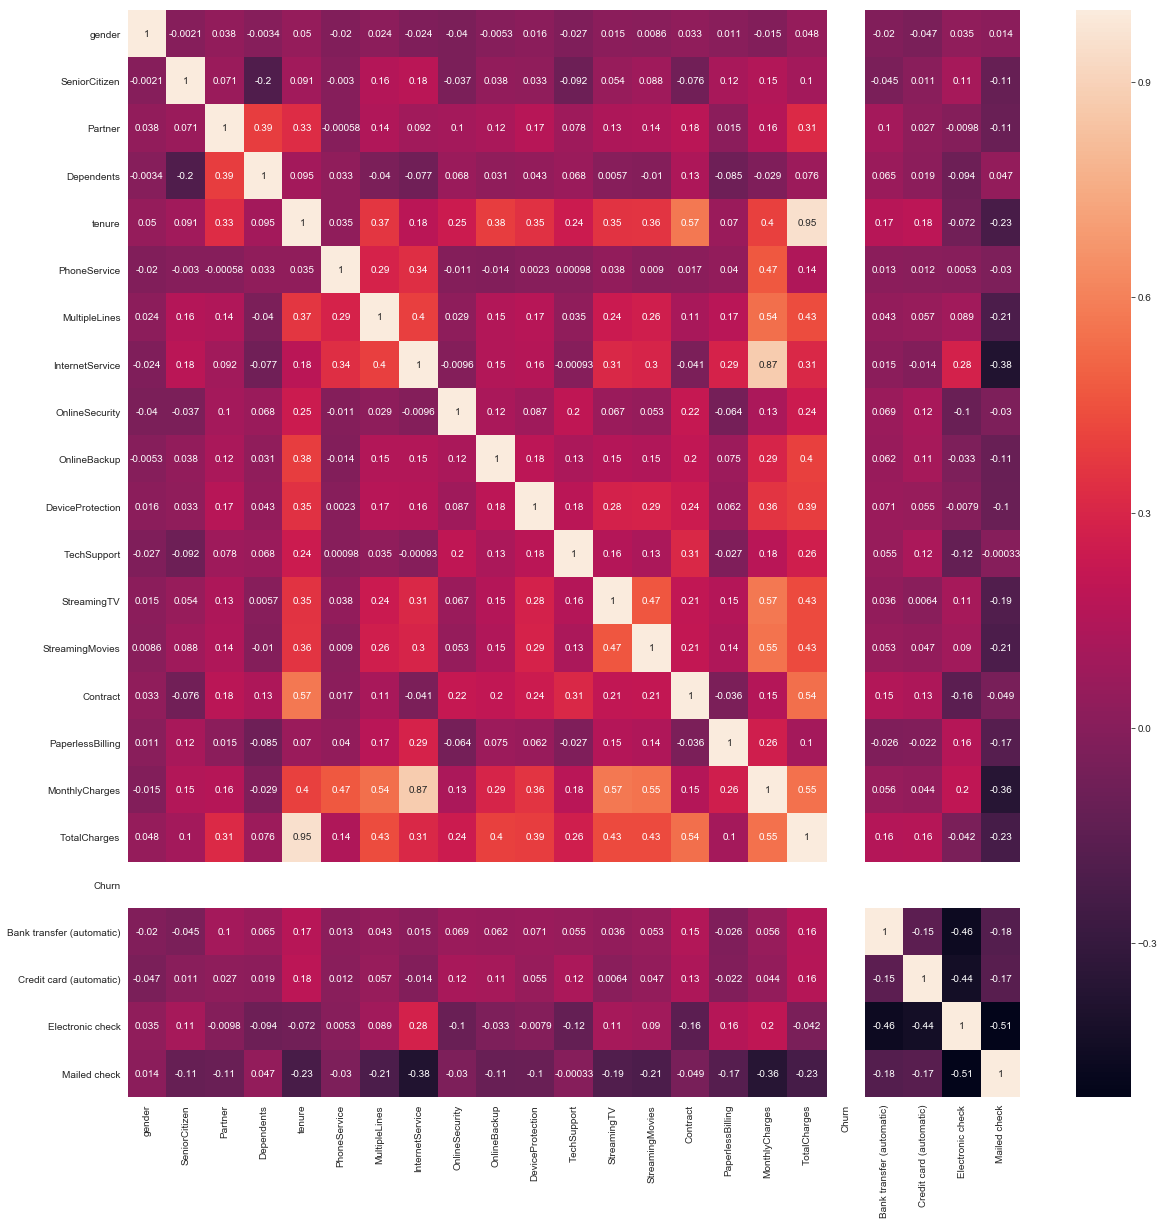

In [22]:
# Run heatmap to check for variable correlations for churn_yes.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_yes.corr(), annot=True, annot_kws={"size": 10})

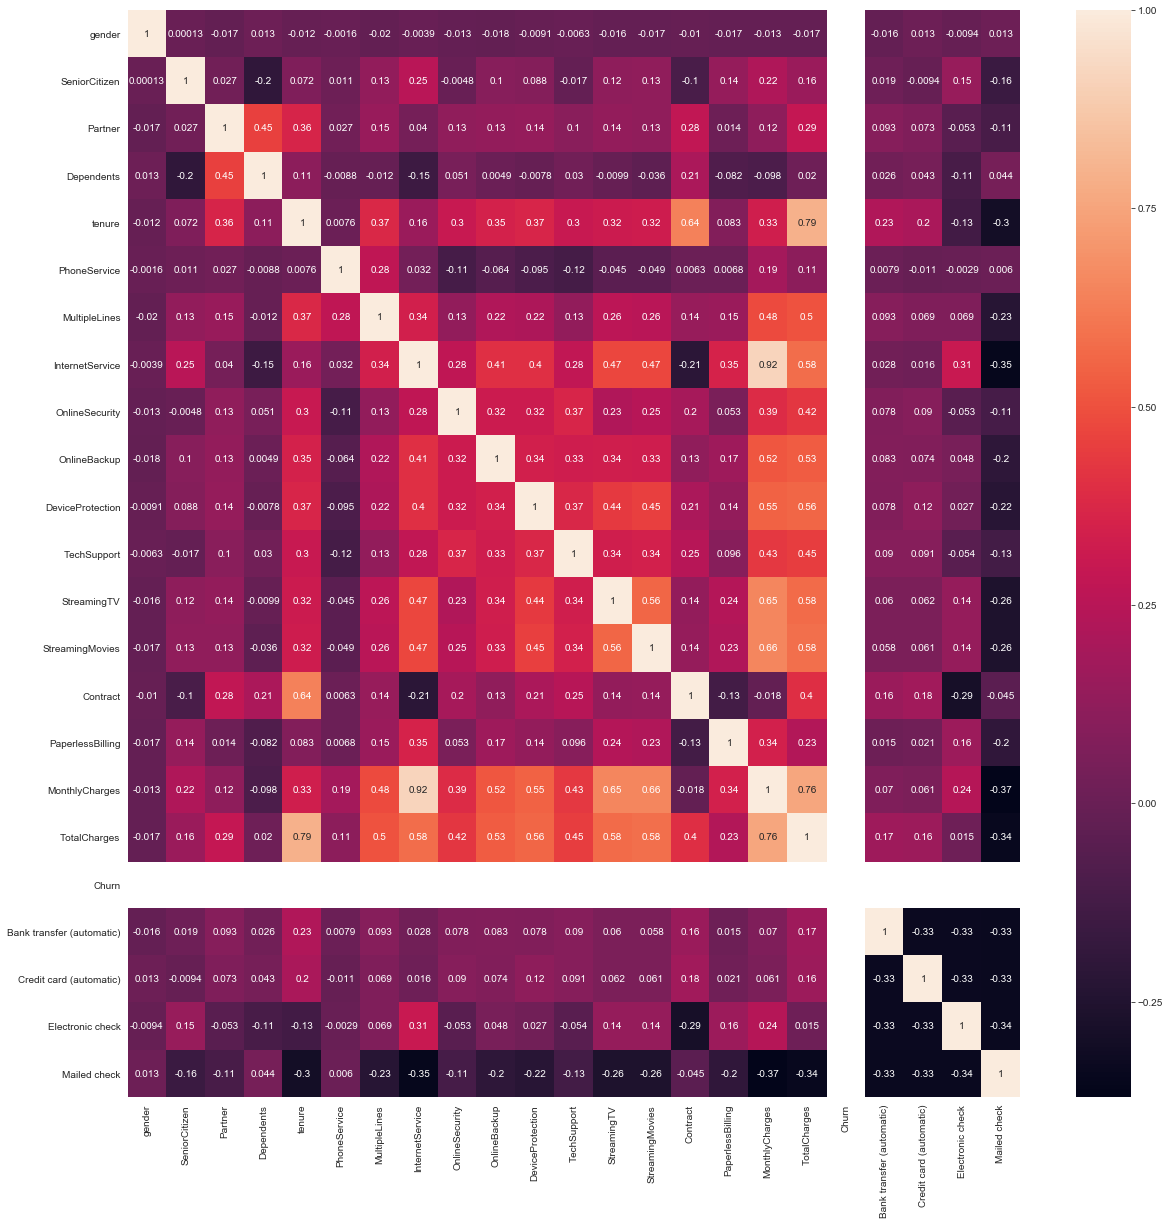

In [23]:
# Run heatmap to check for variable correlations.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_no.corr(), annot=True, annot_kws={"size": 10})

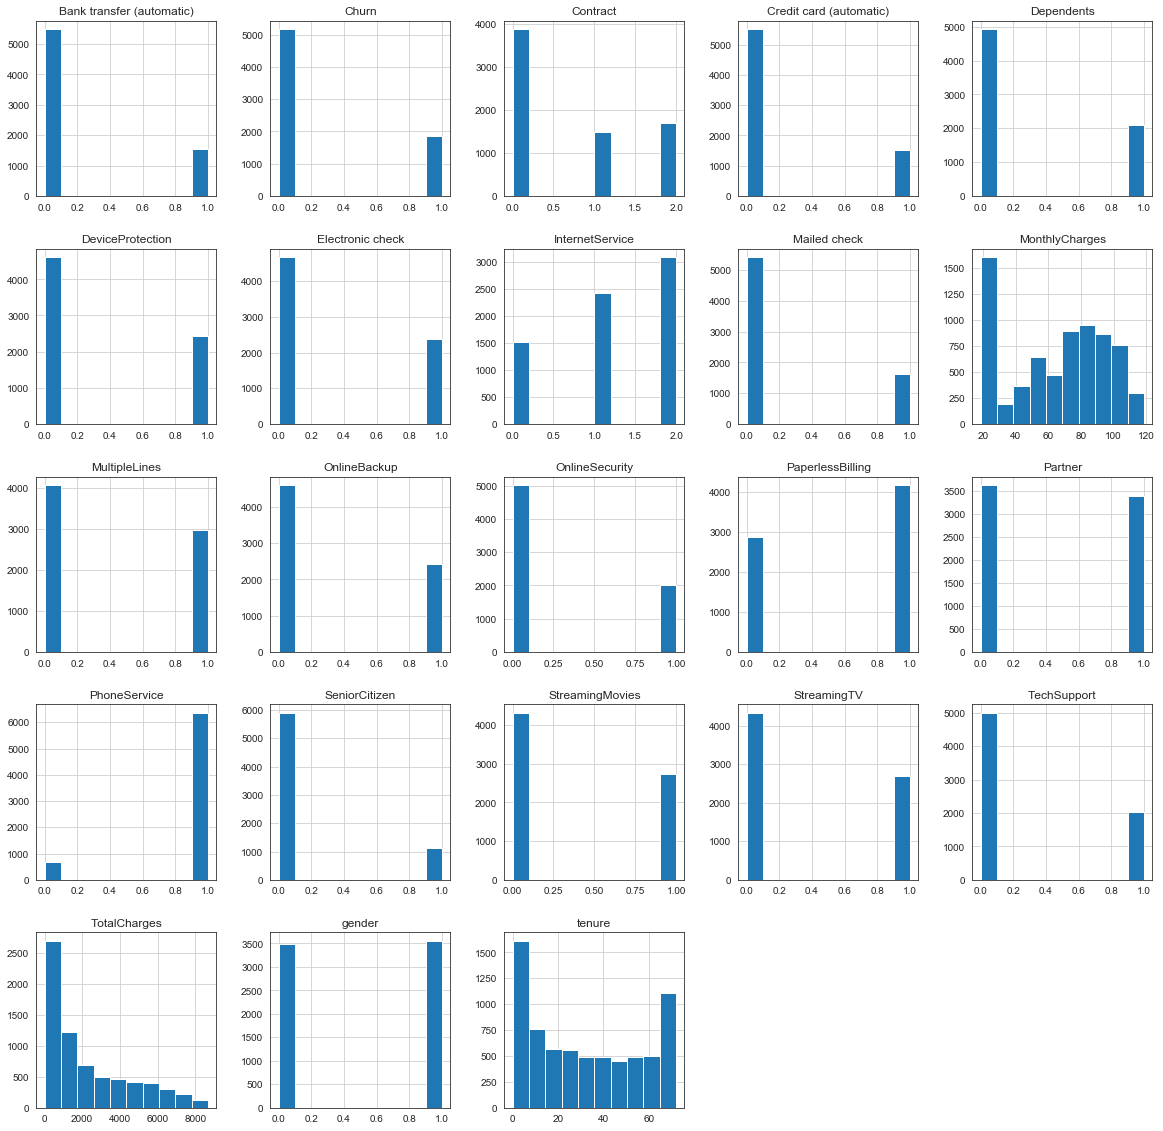

In [24]:
# Visualize the data.
hist = churn_dum.hist(bins=10, figsize=(20, 20))

# Normalize Value Counts

1    3500
0    3500
Name: Churn, dtype: int64

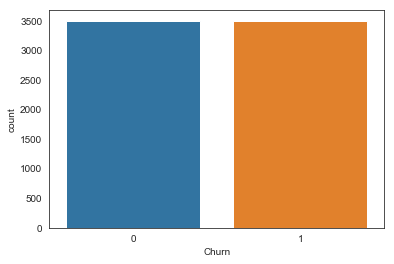

In [25]:
# Let's resample the data.
from sklearn.utils import resample

# Upsample minority class.
churn_yes = resample(churn_yes,
                     replace=True,
                     n_samples=3500,
                     random_state=15)

# Downsample majority class.
churn_no = resample(churn_no,
                    replace=True,
                    n_samples=3500,
                    random_state=15)

# Combine upsampled minority class and downsampled majority class.
churn_sampled = pd.concat([churn_yes, churn_no])

# Display new class counts.
sns.countplot('Churn', data=churn_sampled)
churn_sampled.Churn.value_counts()

In [26]:
churn_sampled.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,...,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000
mean,0.509,0.195,0.442,0.256,27.611,0.903,0.432,1.359,0.245,0.330,...,0.396,0.507,0.646,67.821,2020.074,0.500,0.188,0.193,0.410,0.210
std,0.500,0.396,0.497,0.437,24.099,0.296,0.495,0.746,0.430,0.470,...,0.489,0.763,0.478,28.550,2177.419,0.500,0.391,0.394,0.492,0.407
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,18.400,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,5.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,45.650,265.338,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,0.000,0.000,21.000,1.000,0.000,2.000,0.000,0.000,...,0.000,0.000,1.000,74.350,1145.525,0.500,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.000,49.000,1.000,1.000,2.000,0.000,1.000,...,1.000,1.000,1.000,90.763,3168.750,1.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,...,1.000,2.000,1.000,118.650,8684.800,1.000,1.000,1.000,1.000,1.000


# Set up Training Groups

In [27]:
# Split data into classes and training groups.
X = churn_sampled.drop(['customerID', 'PaymentMethod', 'Churn'], 1)
y = churn_sampled.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

# Naive Bayes

In [28]:
# Run Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train, y_train)
print(gnb)
y_pred_gnb = gnb.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gnb_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.77       0.76142857 0.74285714 0.76857143 0.78285714 0.76571429
 0.75857143 0.75714286 0.75428571 0.74428571]
Averaged Cross-Validation Scores: 76.06%.
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       884
           1       0.75      0.81      0.78       866

   micro avg       0.77      0.77      0.77      1750
   macro avg       0.77      0.77      0.77      1750
weighted avg       0.77      0.77      0.77      1750

[[652 232]
 [167 699]]


# K-Nearest Neighbors

In [29]:
# Build the KNN model.
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
# Fit the model.
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(knn_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
Cross-Validation Scores: [0.75714286 0.73714286 0.76142857 0.76857143 0.77142857 0.77
 0.75857143 0.74285714 0.74428571 0.76      ]
Averaged Cross-Validation Scores: 75.71%.
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       884
           1       0.72      0.77      0.75       866

   micro avg       0.74      0.74      0.74      1750
   macro avg       0.74      0.74      0.74      1750
weighted avg       0.74      0.74      0.74      1750

[[629 255]
 [200 666]]


# Decision Tree

In [30]:
# Build the Decision Tree model.
# Import tools.
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

dtc = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=15
)
# Fit the model.
dtc.fit(X_train, y_train)
print(dtc)
y_pred_dtc = dtc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc)
# Cross-validation.
dtc_score = cross_val_score(dtc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(dtc_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_dtc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')
Cross-Validation Scores: [0.62428571 0.60857143 0.59285714 0.61571429 0.62142857 0.61714286
 0.63142857 0.62714286 0.60714286 0.60428571]
Averaged Cross-Validation Scores: 61.50%.
              precision    recall  f1-score   support

           0       0.70      0.42      0.53       884
           1       0.58      0.82      0.68       866

   micro avg       0.62      0.62      0.62      1750
   macro avg       0.64      0.62      0.60      1750
weighted avg       0.64      0.62      0.60      1750

[[373 511]
 [157 709]]


# Random Forest

In [31]:
# Build the Random Forest model.
rfc = RandomForestClassifier()
# Fit the model.
rfc.fit(X_train, y_train)
print(rfc)
y_pred_rfc = rfc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc)
# Cross-validation.
rfc_score = cross_val_score(rfc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(rfc_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_rfc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Cross-Validation Scores: [0.90285714 0.91       0.89857143 0.92857143 0.92142857 0.91714286
 0.92       0.89428571 0.91571429 0.90428571]
Averaged Cross-Validation Scores: 91.13%.
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       884
           1       0.89      0.91      0.90       866

   micro avg       0.90      0.90      0.90      1750
   macro avg       0.90      0.90      0.90      1750
weighted avg       0.90      0.90      0.90      1750

[[783 101]
 [ 80 786]]


# Logistic Regression

In [32]:
# Build the Logistic Regression model.
lr = LogisticRegression(solver='lbfgs')
# Fit the model.
lr.fit(X_train, y_train)
print(lr)
y_pred_lr = lr.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_lr)
# Cross-validation.
lr_score = cross_val_score(lr, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_lr))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Cross-Validation Scores: [0.77428571 0.74714286 0.76428571 0.78428571 0.79571429 0.76857143
 0.76714286 0.75428571 0.76285714 0.75428571]
Averaged Cross-Validation Scores: 76.73%.
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       884
           1       0.75      0.82      0.78       866

   micro avg       0.77      0.77      0.77      1750
   macro avg       0.78      0.77      0.77      1750
weighted avg       0.78      0.77      0.77      1750

[[642 242]
 [156 710]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Support Vector Machines

In [33]:
# Build the SVC model.
svc = LinearSVC(max_iter=8000)
# Fit the model.
svc.fit(X_train, y_train)
print(svc)
y_pred_svc = svc.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc)
# Cross-validation.
svc_score = cross_val_score(svc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(svc_score.mean()))
# Classification score.
print(classification_report(y_test, y_pred_svc))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=8000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Cross-Validation Scores: [0.77285714 0.62857143 0.71285714 0.61285714 0.67428571 0.73857143
 0.73571429 0.69142857 0.57142857 0.54      ]
Averaged Cross-Validation Scores: 66.79%.
              precision    recall  f1-score   support

           0       0.92      0.25      0.39       884
           1       0.56      0.98      0.71       866

   micro avg       0.61      0.61      0.61      1750
   macro avg       0.74      0.61      0.55      1750
weighted avg       0.74      0.61      0.55      1750

[[217 667]
 [ 20 846]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Gradient Boosting

In [34]:
# Build the Gradient Boosting model.
gbm = ensemble.GradientBoostingClassifier()
# Fit the model.
gbm.fit(X_train, y_train)
print(gbm)
y_pred_gbm = gbm.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbm)
# Cross-validation.
gbm_score = cross_val_score(gbm, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbm_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gbm_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gbm))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbm))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Cross-Validation Scores: [0.79428571 0.78571429 0.79428571 0.80428571 0.80428571 0.80428571
 0.80285714 0.80857143 0.80285714 0.76857143]
Averaged Cross-Validation Scores: 79.70%.
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       884
           1       0.77      0.87      0.82       866

   micro avg       0.81      0.81      0.81      1750
   macro avg       0.81      0.81      0.81      1750
wei

In [35]:
print('Naive Bayes Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_score.mean()))
print('K-Nearest Neighbors Averaged Cross-Validation Scores: {:.2%}.'.format(
    knn_score.mean()))
print('Decision Tree Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_score.mean()))
print('Random Forest Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_score.mean()))
print('Logistic Regression Averaged Cross-Validation Scores: {:.2%}.'.format(
    lr_score.mean()))
print('Linear Support Vector Averaged Cross-Validation Score: {:.2%}.'.format(
    svc_score.mean()))
print('Gradient Boosting Averaged Cross-Validation Score: {:.2%}.'.format(
    gbm_score.mean()))

Naive Bayes Averaged Cross-Validation Scores: 76.06%.
K-Nearest Neighbors Averaged Cross-Validation Scores: 75.71%.
Decision Tree Averaged Cross-Validation Scores: 61.50%.
Random Forest Averaged Cross-Validation Scores: 91.13%.
Logistic Regression Averaged Cross-Validation Scores: 76.73%.
Linear Support Vector Averaged Cross-Validation Score: 66.79%.
Gradient Boosting Averaged Cross-Validation Score: 79.70%.


# SelectKBest

In [36]:
# SelectKBest model.
# Import tools.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create and fit selector
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()

(7000, 10)


['Dependents',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'Credit card (automatic)',
 'Electronic check']

# Random Forest with SelectKBest

In [37]:
# Run Random Forest model with SelectKBest.
rfc.fit(X_skbest, y)
y_pred_rfc = rfc.predict(X_skbest)
rfc_score_skbest = cross_val_score(rfc, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_score_skbest.mean()))

Cross-Validation Scores: [0.89571429 0.90857143 0.9        0.89571429 0.90571429 0.90142857
 0.89857143 0.89142857 0.89571429 0.88428571]
Averaged Cross-Validation Scores: 89.77%.


# SVC with SelectKBest

In [38]:
# Run SVC model with SelectKBest.
svc.fit(X_skbest, y)
y_pred_svc = svc.predict(X_skbest)
svc_score_skbest = cross_val_score(svc, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    svc_score_skbest.mean()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Cross-Validation Scores: [0.69285714 0.58285714 0.65714286 0.58       0.75       0.72857143
 0.73       0.61571429 0.73714286 0.70857143]
Averaged Cross-Validation Scores: 67.83%.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Scale data and PCA

In [39]:
# Scaling data.
sc = StandardScaler()
X = sc.fit_transform(X)

# Set up PCA.
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

# Resplit training sets.
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, random_state=15)

print('Percentage of total variance explained by each component:\n',
      pca.explained_variance_ratio_)

Percentage of total variance explained by each component:
 [0.22306145 0.14659834 0.06174941 0.05694636 0.05625401 0.05237261
 0.04604669 0.04302885 0.04197715]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Naive Bayes with PCA

In [40]:
# Run Naive Bayes model with PCA.
gnb_pca = GaussianNB()
# Fit the model.
gnb_pca.fit(X_pca_train, y_train)
print(gnb_pca)
y_pred_gnb = gnb_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_pca_score = cross_val_score(gnb_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.75857143 0.73       0.73285714 0.74857143 0.77428571 0.76571429
 0.75285714 0.74571429 0.74142857 0.73428571]
Averaged Cross-Validation Scores: 74.84%.
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       884
           1       0.74      0.79      0.76       866

   micro avg       0.76      0.76      0.76      1750
   macro avg       0.76      0.76      0.76      1750
weighted avg       0.76      0.76      0.76      1750

[[642 242]
 [186 680]]


# KNN with PCA

In [41]:
# Run K-Nearest Neighbors model with PCA.
knn_pca = neighbors.KNeighborsClassifier()
# Fit the model.
knn_pca.fit(X_pca_train, y_train)
print(knn_pca)
y_pred_knn_pca = knn_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn_pca)
# Cross-validation.
knn_pca_score = cross_val_score(knn_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.
      format(knn_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn_pca))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Cross-Validation Scores: 0.7784285714285714
Averaged Cross-Validation Scores: 77.84%.
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       884
           1       0.75      0.84      0.79       866

   micro avg       0.78      0.78      0.78      1750
   macro avg       0.79      0.78      0.78      1750
weighted avg       0.79      0.78      0.78      1750

[[643 241]
 [139 727]]


# Decision Tree with PCA

In [42]:
# Run Decision Tree model with PCA.
dtc_pca = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=15
)
# Fit the model.
dtc_pca.fit(X_pca_train, y_train)
print(dtc_pca)
y_pred_dtc_pca = dtc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc_pca)
# Cross-validation.
dtc_pca_score = cross_val_score(dtc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_dtc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc_pca))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')
Cross-Validation Scores: 0.6428571428571429
Averaged Cross-Validation Scores: 64.29%.
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       884
           1       0.59      0.84      0.69       866

   micro avg       0.63      0.63      0.63      1750
   macro avg       0.66      0.63      0.62      1750
weighted avg       0.66      0.63      0.62      1750

[[382 502]
 [141 725]]


# Random Forest with PCA

In [43]:
# Run Random Forest model with PCA.
rfc_pca = RandomForestClassifier()
# Fit the model.
rfc_pca.fit(X_pca_train, y_train)
print(rfc_pca)
y_pred_rfc_pca = rfc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc_pca)
# Cross-validation.
rfc_pca_score = cross_val_score(rfc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_rfc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc_pca))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Cross-Validation Scores: [0.89571429 0.89857143 0.89428571 0.89714286 0.90571429 0.89428571
 0.89428571 0.91428571 0.9        0.90142857]
Averaged Cross-Validation Scores: 89.96%.
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       884
           1       0.88      0.90      0.89       866

   micro avg       0.89      0.89      0.89      1750
   macro avg       0.89      0.89      0.89      1750
weighted avg       0.89      0.89      0.89      1750

[[776 108]
 [ 86 780]]


# Logistic Regression with PCA

In [44]:
# Run Logistic Regression model with PCA.
lr_pca = LogisticRegression(solver='lbfgs')
# Fit the model.
lr_pca.fit(X_pca_train, y_train)
print(lr_pca)
y_pred_lr_pca = lr_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_lr_pca)
# Cross-validation.
lr_pca_score = cross_val_score(lr_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_lr_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr_pca))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Cross-Validation Scores: [0.76285714 0.74       0.75714286 0.76428571 0.78714286 0.77
 0.75571429 0.76285714 0.75142857 0.72714286]
Averaged Cross-Validation Scores: 75.79%.
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       884
           1       0.74      0.79      0.76       866

   micro avg       0.76      0.76      0.76      1750
   macro avg       0.76      0.76      0.76      1750
weighted avg       0.76      0.76      0.76      1750

[[641 243]
 [180 686]]


# SVC with PCA

In [45]:
# Run LinearSVC model with PCA.
svc_pca = LinearSVC(max_iter=8000)
# Fit the model.
svc_pca.fit(X_pca_train, y_train)
print(svc_pca)
y_pred_svc_pca = svc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc_pca)
# Cross-validation.
svc_pca_score = cross_val_score(svc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    svc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_svc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc_pca))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=8000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Cross-Validation Scores: [0.76714286 0.74       0.75857143 0.76571429 0.78571429 0.76714286
 0.75857143 0.76142857 0.75428571 0.72714286]
Averaged Cross-Validation Scores: 75.86%.
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       884
           1       0.73      0.80      0.77       866

   micro avg       0.76      0.76      0.76      1750
   macro avg       0.76      0.76      0.76      1750
weighted avg       0.76      0.76      0.76      1750

[[634 250]
 [174 692]]


# Gradient Boosting with PCA

In [46]:
# Run Gradient Boosting model with PCA.
gbc_pca = ensemble.GradientBoostingClassifier()
# Fit the model.
gbc_pca.fit(X_pca_train, y_train)
print(gbc_pca)
y_pred_gbc_pca = gbc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbc_pca)
# Cross-validation.
gbc_pca_score = cross_val_score(gbc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gbc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gbc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbc_pca))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Cross-Validation Scores: [0.79142857 0.77428571 0.79571429 0.78142857 0.81571429 0.80285714
 0.77714286 0.80571429 0.78285714 0.75714286]
Averaged Cross-Validation Scores: 78.84%.
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       884
           1       0.75      0.85      0.80       866

   micro avg       0.79      0.79      0.79      1750
   macro avg       0.79      0.79      0.79      1750
wei

In [47]:
print('Naive Bayes PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
print('K-Nearest Neighbors PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(knn_pca_score.mean()))
print('Decision Tree PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
print('Random Forest PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
print('Logistic Regression PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(lr_pca_score.mean()))
print('Linear Support Vector PCA Averaged Cross-Validation Score: {:.2%}.'
      .format(svc_pca_score.mean()))
print('Gradient Boosting PCA Averaged Cross-Validation Score: {:.2%}.'.format(
    gbc_pca_score.mean()))

Naive Bayes PCA Averaged Cross-Validation Scores: 74.84%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.84%.
Decision Tree PCA Averaged Cross-Validation Scores: 64.29%.
Random Forest PCA Averaged Cross-Validation Scores: 89.96%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.79%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.86%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.84%.


# Comparing PCA with various n_components values
## n_components = 6

In [48]:
"""
n=6
Naive Bayes PCA Averaged Cross-Validation Scores: 74.63%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.07%.
Decision Tree PCA Averaged Cross-Validation Scores: 70.26%.
Random Forest PCA Averaged Cross-Validation Scores: 90.37%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.33%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.23%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.50%.
"""

'\nn=6\nNaive Bayes PCA Averaged Cross-Validation Scores: 74.63%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.07%.\nDecision Tree PCA Averaged Cross-Validation Scores: 70.26%.\nRandom Forest PCA Averaged Cross-Validation Scores: 90.37%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 75.33%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 75.23%.\nGradient Boosting PCA Averaged Cross-Validation Score: 78.50%.\n'

## n_components = 7

In [49]:
"""
n=7
Naive Bayes PCA Averaged Cross-Validation Scores: 74.43%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.47%.
Decision Tree PCA Averaged Cross-Validation Scores: 58.16%.
Random Forest PCA Averaged Cross-Validation Scores: 89.44%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.56%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.59%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.54%.
"""

'\nn=7\nNaive Bayes PCA Averaged Cross-Validation Scores: 74.43%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.47%.\nDecision Tree PCA Averaged Cross-Validation Scores: 58.16%.\nRandom Forest PCA Averaged Cross-Validation Scores: 89.44%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 75.56%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 75.59%.\nGradient Boosting PCA Averaged Cross-Validation Score: 78.54%.\n'

## n_components = 8

In [50]:
"""
n=8
Naive Bayes PCA Averaged Cross-Validation Scores: 74.69%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.39%.
Decision Tree PCA Averaged Cross-Validation Scores: 64.10%.
Random Forest PCA Averaged Cross-Validation Scores: 90.20%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.44%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.56%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.67%.
"""

'\nn=8\nNaive Bayes PCA Averaged Cross-Validation Scores: 74.69%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.39%.\nDecision Tree PCA Averaged Cross-Validation Scores: 64.10%.\nRandom Forest PCA Averaged Cross-Validation Scores: 90.20%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 75.44%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 75.56%.\nGradient Boosting PCA Averaged Cross-Validation Score: 78.67%.\n'

## n_components = 9 (*chosen)

In [51]:
"""
n=9
Naive Bayes PCA Averaged Cross-Validation Scores: 74.84%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.86%.
Decision Tree PCA Averaged Cross-Validation Scores: 64.29%.
Random Forest PCA Averaged Cross-Validation Scores: 90.31%.
Logistic Regression PCA Averaged Cross-Validation Scores: 75.79%.
Linear Support Vector PCA Averaged Cross-Validation Score: 75.86%.
Gradient Boosting PCA Averaged Cross-Validation Score: 79.04%.
"""

'\nn=9\nNaive Bayes PCA Averaged Cross-Validation Scores: 74.84%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.86%.\nDecision Tree PCA Averaged Cross-Validation Scores: 64.29%.\nRandom Forest PCA Averaged Cross-Validation Scores: 90.31%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 75.79%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 75.86%.\nGradient Boosting PCA Averaged Cross-Validation Score: 79.04%.\n'

## n_components = 10

In [52]:
"""
n=10
Naive Bayes PCA Averaged Cross-Validation Scores: 75.07%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.60%.
Decision Tree PCA Averaged Cross-Validation Scores: 60.73%.
Random Forest PCA Averaged Cross-Validation Scores: 90.63%.
Logistic Regression PCA Averaged Cross-Validation Scores: 76.27%.
Linear Support Vector PCA Averaged Cross-Validation Score: 76.04%.
Gradient Boosting PCA Averaged Cross-Validation Score: 79.13%.
"""

'\nn=10\nNaive Bayes PCA Averaged Cross-Validation Scores: 75.07%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.60%.\nDecision Tree PCA Averaged Cross-Validation Scores: 60.73%.\nRandom Forest PCA Averaged Cross-Validation Scores: 90.63%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 76.27%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 76.04%.\nGradient Boosting PCA Averaged Cross-Validation Score: 79.13%.\n'

## n_components = 11

In [53]:
"""
Naive Bayes PCA Averaged Cross-Validation Scores: 74.99%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.16%.
Decision Tree PCA Averaged Cross-Validation Scores: 75.29%.
Random Forest PCA Averaged Cross-Validation Scores: 89.97%.
Logistic Regression PCA Averaged Cross-Validation Scores: 76.27%.
Linear Support Vector PCA Averaged Cross-Validation Score: 76.39%.
Gradient Boosting PCA Averaged Cross-Validation Score: 79.64%.
"""

'\nNaive Bayes PCA Averaged Cross-Validation Scores: 74.99%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.16%.\nDecision Tree PCA Averaged Cross-Validation Scores: 75.29%.\nRandom Forest PCA Averaged Cross-Validation Scores: 89.97%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 76.27%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 76.39%.\nGradient Boosting PCA Averaged Cross-Validation Score: 79.64%.\n'